### Student Information
Name: 潘婷蓁

Student ID: 111034508

GitHub ID: sonepanpan

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

# 1. Take Home Exercise

In [1]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from sklearn.decomposition import PCA
import sys
import data_mining_helpers as dmh

In [2]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
# obtain the documents containing the categories provided
twenty_train = fetch_20newsgroups(subset='train', categories=categories, 
                                  shuffle=True, random_state=42)
# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
# add category to the dataframe
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

In [3]:
X.head()

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian


### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [4]:
#query which category==0
X.loc[X['category']==0]

,text,category,category_name
12,From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...,0,alt.atheism
13,Subject: So what is Maddi? From: madhaus@netco...,0,alt.atheism
17,Organization: Penn State University From: <JSN...,0,alt.atheism
19,Subject: Re: Don't more innocents die without ...,0,alt.atheism
21,From: gmiller@worldbank.org (Gene C. Miller) S...,0,alt.atheism
...,...,...,...
2231,"Subject: Re: Feminism and Islam, again From: k...",0,alt.atheism
2233,From: kmr4@po.CWRU.edu (Keith M. Ryan) Subject...,0,alt.atheism
2234,From: David.Rice@ofa123.fidonet.org Subject: i...,0,alt.atheism
2237,From: datepper@phoenix.Princeton.EDU (David Aa...,0,alt.atheism


In [5]:
#quert column using slice by column_name
X.loc[0:5, 'text':'category']

,text,category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3


### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [7]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [8]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

### Answer

In [9]:
# because those element are string but content equal to 'NaN'
# Need to convert those string
def find_null(element):
    if (type(element)==str and element in ['', 'NaN', 'None']):
        return None
    else:
        return element

In [10]:
#some is a string with content
NA_df['missing_example'] = NA_df['missing_example'].apply(lambda x: find_null(x))
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,NaN
4,E,NaN
5,F,NaN


In [11]:
# check it again after convert
NA_df['missing_example'].isnull()

0    True
1    True
2    True
3    True
4    True
5    True
Name: missing_example, dtype: bool

### >>> Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [12]:
X_sample = X.sample(n=1000,random_state=42) #random state

### Answer

In [13]:
# X_sample will be randomly suffled
X_sample.head()

,text,category,category_name
561,From: ray@engr.LaTech.edu (Bill Ray) Subject: ...,2,sci.med
440,From: jkellett@netcom.com (Joe Kellett) Subjec...,3,soc.religion.christian
1513,From: noring@netcom.com (Jon Noring) Subject: ...,2,sci.med
1360,From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...,3,soc.religion.christian
259,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism


### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

![alt txt](https://i.imgur.com/9eO431H.png)

In [14]:
count_X = dict(X.category_name.value_counts())
count_X_sample = dict(X_sample.category_name.value_counts())

In [15]:
L = list(zip(list(count_X.keys()), list(count_X.values()),  list(count_X_sample.values())))

In [16]:
df = pd.DataFrame(L, columns=['Category', 'X', 'X_sample'])
df

,Category,X,X_sample
0,soc.religion.christian,599,277
1,sci.med,594,270
2,comp.graphics,584,247
3,alt.atheism,480,206


<Axes: xlabel='Category'>

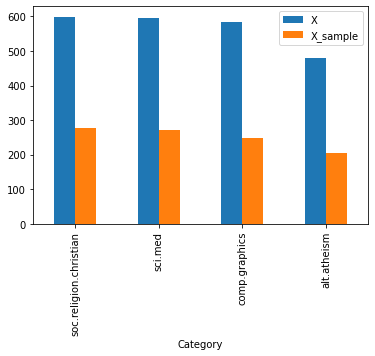

In [17]:
df.plot(x='Category', 
        kind='bar', 
        stacked=False, 
        )

One thing that stood out from the both datasets, is that the distribution of the categories remain relatively the same, which is a good sign for us data scientist. There are many ways to conduct sampling on the dataset and still obtain a representative enough dataset. That is not the main focus in this notebook, but if you would like to know more about sampling and how the `sample` feature works, just reference the Pandas documentation and you will find interesting ways to conduct more advanced sampling.

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [21]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X['text'])
analyze = count_vect.build_analyzer()
analyze("Hello World!")

['hello', 'world']

In [22]:
def find_index(array):
    for i in range(1, 100):
        if array[i]==1:
            return i

In [23]:
# Answer here
index = find_index(np.squeeze(X_counts[4, 0:100].toarray()))
count_vect.get_feature_names_out()[index]

'01'

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [24]:
X_counts_df = pd.DataFrame(X_counts.toarray(), index=X.index, columns=count_vect.get_feature_names_out()) #X_counts[how many documents, how many terms]
X_counts_df

,00,000,0000,0000001200,000005102000,0001,000100255pixel,00014,000406,0007,...,zvi,zvonko,zwart,zyeh,zyklon,zyxel,zz,zzz,ªl,íålittin
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2252,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2253,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2254,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2255,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
X_freq = np.asarray(X_counts.sum(axis=0))
X_freq

array([[134,  92,   1, ...,   1,   1,   1]])

In [26]:
#出現字數前10多的字
L = list(np.squeeze(np.flip(np.argsort(X_freq))[:10]))

In [27]:
X_counts_df = X_counts_df.iloc[:, L]
X_counts_df = X_counts_df.iloc[:, :10]

In [28]:
X_counts_df

,the,of,to,and,is,in,that,it,you,for
0,5,1,4,0,1,1,0,0,0,0
1,11,8,4,0,10,2,0,2,0,2
2,14,10,26,9,4,6,8,8,13,6
3,6,2,0,1,1,3,0,0,0,1
4,10,3,8,3,2,3,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...
2252,0,4,0,1,0,0,0,0,1,2
2253,63,40,32,48,17,22,5,9,5,14
2254,26,17,13,12,14,3,11,5,3,3
2255,123,68,64,59,23,24,8,14,50,32


In [29]:
#前10名頻繁出現這10個字的text
text_freq = np.asarray(X_counts_df.sum(axis=1))
text_freq

array([ 12,  39, 104, ..., 107, 465,  14])

In [30]:
L = list(np.squeeze(np.flip(np.argsort(text_freq))[:10]))

In [31]:
X_counts_df = X_counts_df.iloc[L, :]
X_counts_df = X_counts_df.iloc[:10, :]
X_counts_df

,the,of,to,and,is,in,that,it,you,for
1403,589,326,281,208,174,135,120,111,49,60
433,362,190,227,150,200,108,85,123,190,117
400,249,165,135,207,114,109,39,76,52,157
768,200,164,103,254,90,69,38,87,19,105
1890,242,89,157,185,77,100,25,47,45,133
1596,265,162,112,73,141,98,115,71,28,30
971,175,155,179,73,126,82,130,92,29,48
1411,252,148,113,43,189,39,83,64,24,49
1401,217,204,80,151,28,146,29,5,0,92
1103,200,122,126,112,55,76,61,56,28,36


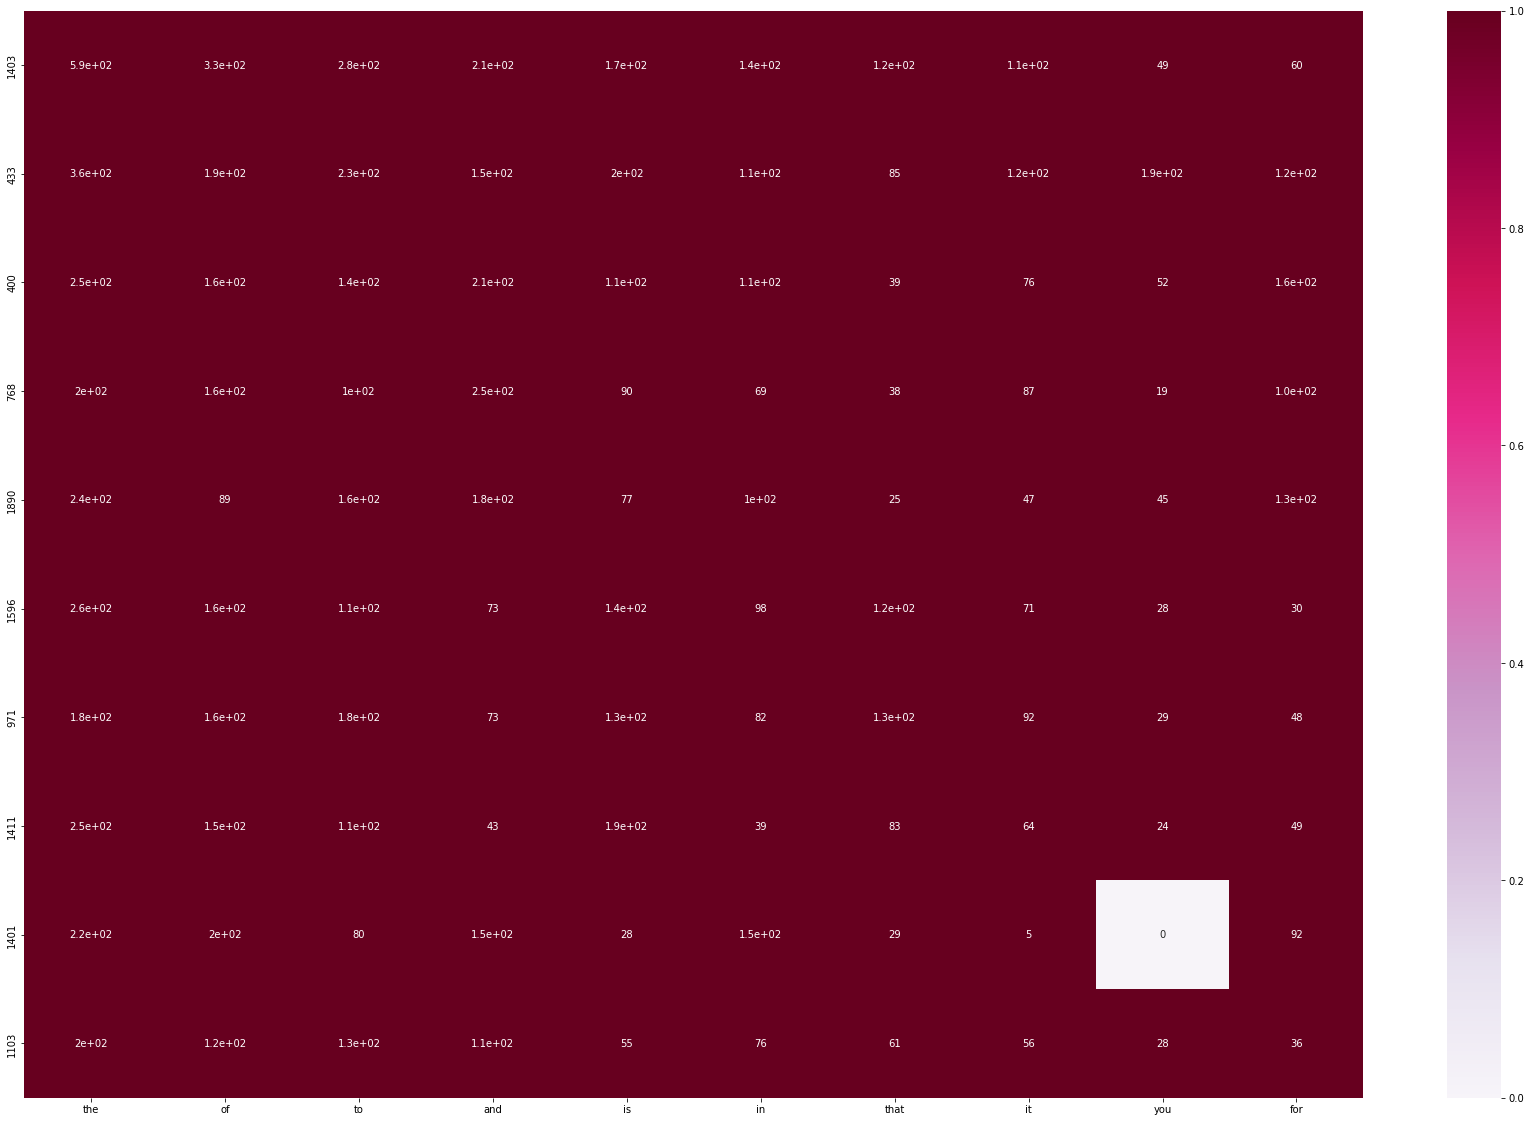

In [32]:
plt.subplots(figsize=(30, 20))
ax = sns.heatmap(X_counts_df,
                 cmap="PuRd",
                 vmin=0, vmax=1,
                 annot=True)

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [33]:
from sklearn.decomposition import PCA

In [34]:
print(X_counts.shape)
X_reduced_3 = PCA(n_components = 3).fit_transform(X_counts.toarray())
print(X_reduced_3.shape)

(2257, 35788)
(2257, 3)


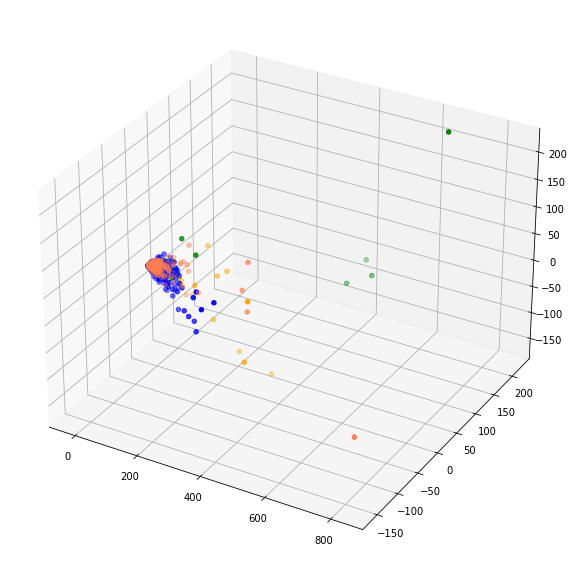

In [35]:
# Answer here
col = ['coral', 'blue', 'green', 'orange']
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize = (10,20))
for c, category in zip(col, categories):
    xs = X_reduced_3[X['category_name'] == category].T[0]
    ys = X_reduced_3[X['category_name'] == category].T[1]
    zs = X_reduced_3[X['category_name'] == category].T[2]   
    ax.scatter(xs, ys, zs, c = c, marker='o')
# ax.view_init(-140, 60)
plt.show()

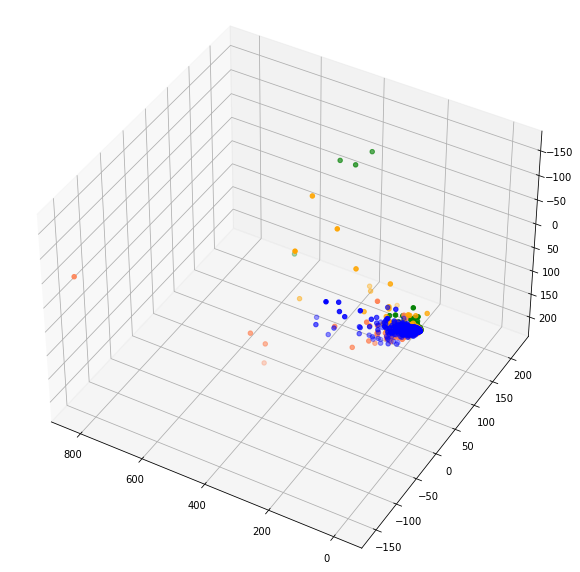

In [36]:
# Answer here
col = ['coral', 'blue', 'green', 'orange']
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize = (10,20))
for c, category in zip(col, categories):
    xs = X_reduced_3[X['category_name'] == category].T[0]
    ys = X_reduced_3[X['category_name'] == category].T[1]
    zs = X_reduced_3[X['category_name'] == category].T[2]   
    ax.scatter(xs, ys, zs, c = c, marker='o')
ax.view_init(-140, 60)
plt.show()

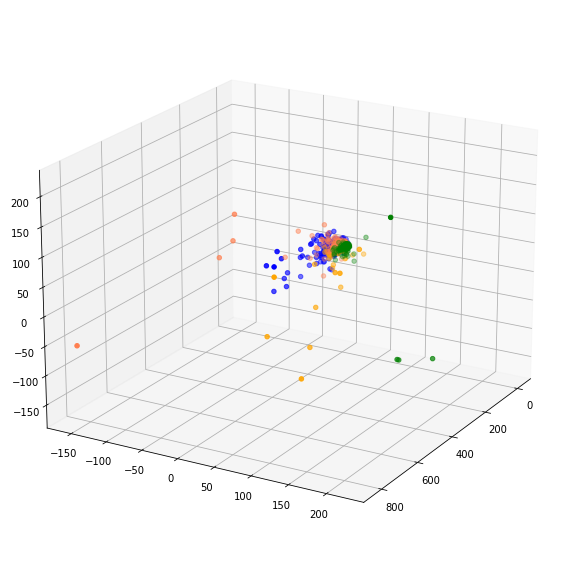

In [37]:
# Answer here
col = ['coral', 'blue', 'green', 'orange']
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize = (10,20))
for c, category in zip(col, categories):
    xs = X_reduced_3[X['category_name'] == category].T[0]
    ys = X_reduced_3[X['category_name'] == category].T[1]
    zs = X_reduced_3[X['category_name'] == category].T[2]   
    ax.scatter(xs, ys, zs, c = c, marker='o')
ax.view_init(20, 30, 0)
plt.show()

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [42]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [43]:
# Answer here
#top 30
L = np.flip(np.argsort(term_frequencies)[-300:])
print(count_vect.get_feature_names_out()[L[0]], term_frequencies[L[0]])

the 29825


In [44]:
term_frequencies[L[0]]

29825

In [50]:
df_count = pd.DataFrame(zip(count_vect.get_feature_names_out(), term_frequencies),
             columns=['word', 'count'])
df_count_300=df_count.loc[list(L)]
df_count_300

,word,count
32142,the,29825
23610,of,17660
32493,to,17222
4992,and,13017
18474,is,12343
...,...,...
35604,yet,274
8713,claim,274
19787,last,270
21033,mark,269


In [57]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=1)
fig.add_trace(
    go.Bar(x=df_count_300['word'],y=df_count_300['count'], marker_color='steelblue'),
    row=1,col=1  
)

fig.update_layout(legend=dict(
    orientation="h",
    xanchor="right",x=1),
    height=600, width=3000, title_text="Interactive Graph : Word Frequency")
fig.show()

### >>> **Exercise 14 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


[Text(0, 0, 'the'),
 Text(1, 0, 'of'),
 Text(2, 0, 'to'),
 Text(3, 0, 'and'),
 Text(4, 0, 'is'),
 Text(5, 0, 'in'),
 Text(6, 0, 'that'),
 Text(7, 0, 'it'),
 Text(8, 0, 'you'),
 Text(9, 0, 'for'),
 Text(10, 0, 'not'),
 Text(11, 0, 'this'),
 Text(12, 0, 'be'),
 Text(13, 0, 'from'),
 Text(14, 0, 'are'),
 Text(15, 0, 'edu'),
 Text(16, 0, 'have'),
 Text(17, 0, 'as'),
 Text(18, 0, 'on'),
 Text(19, 0, 'with')]

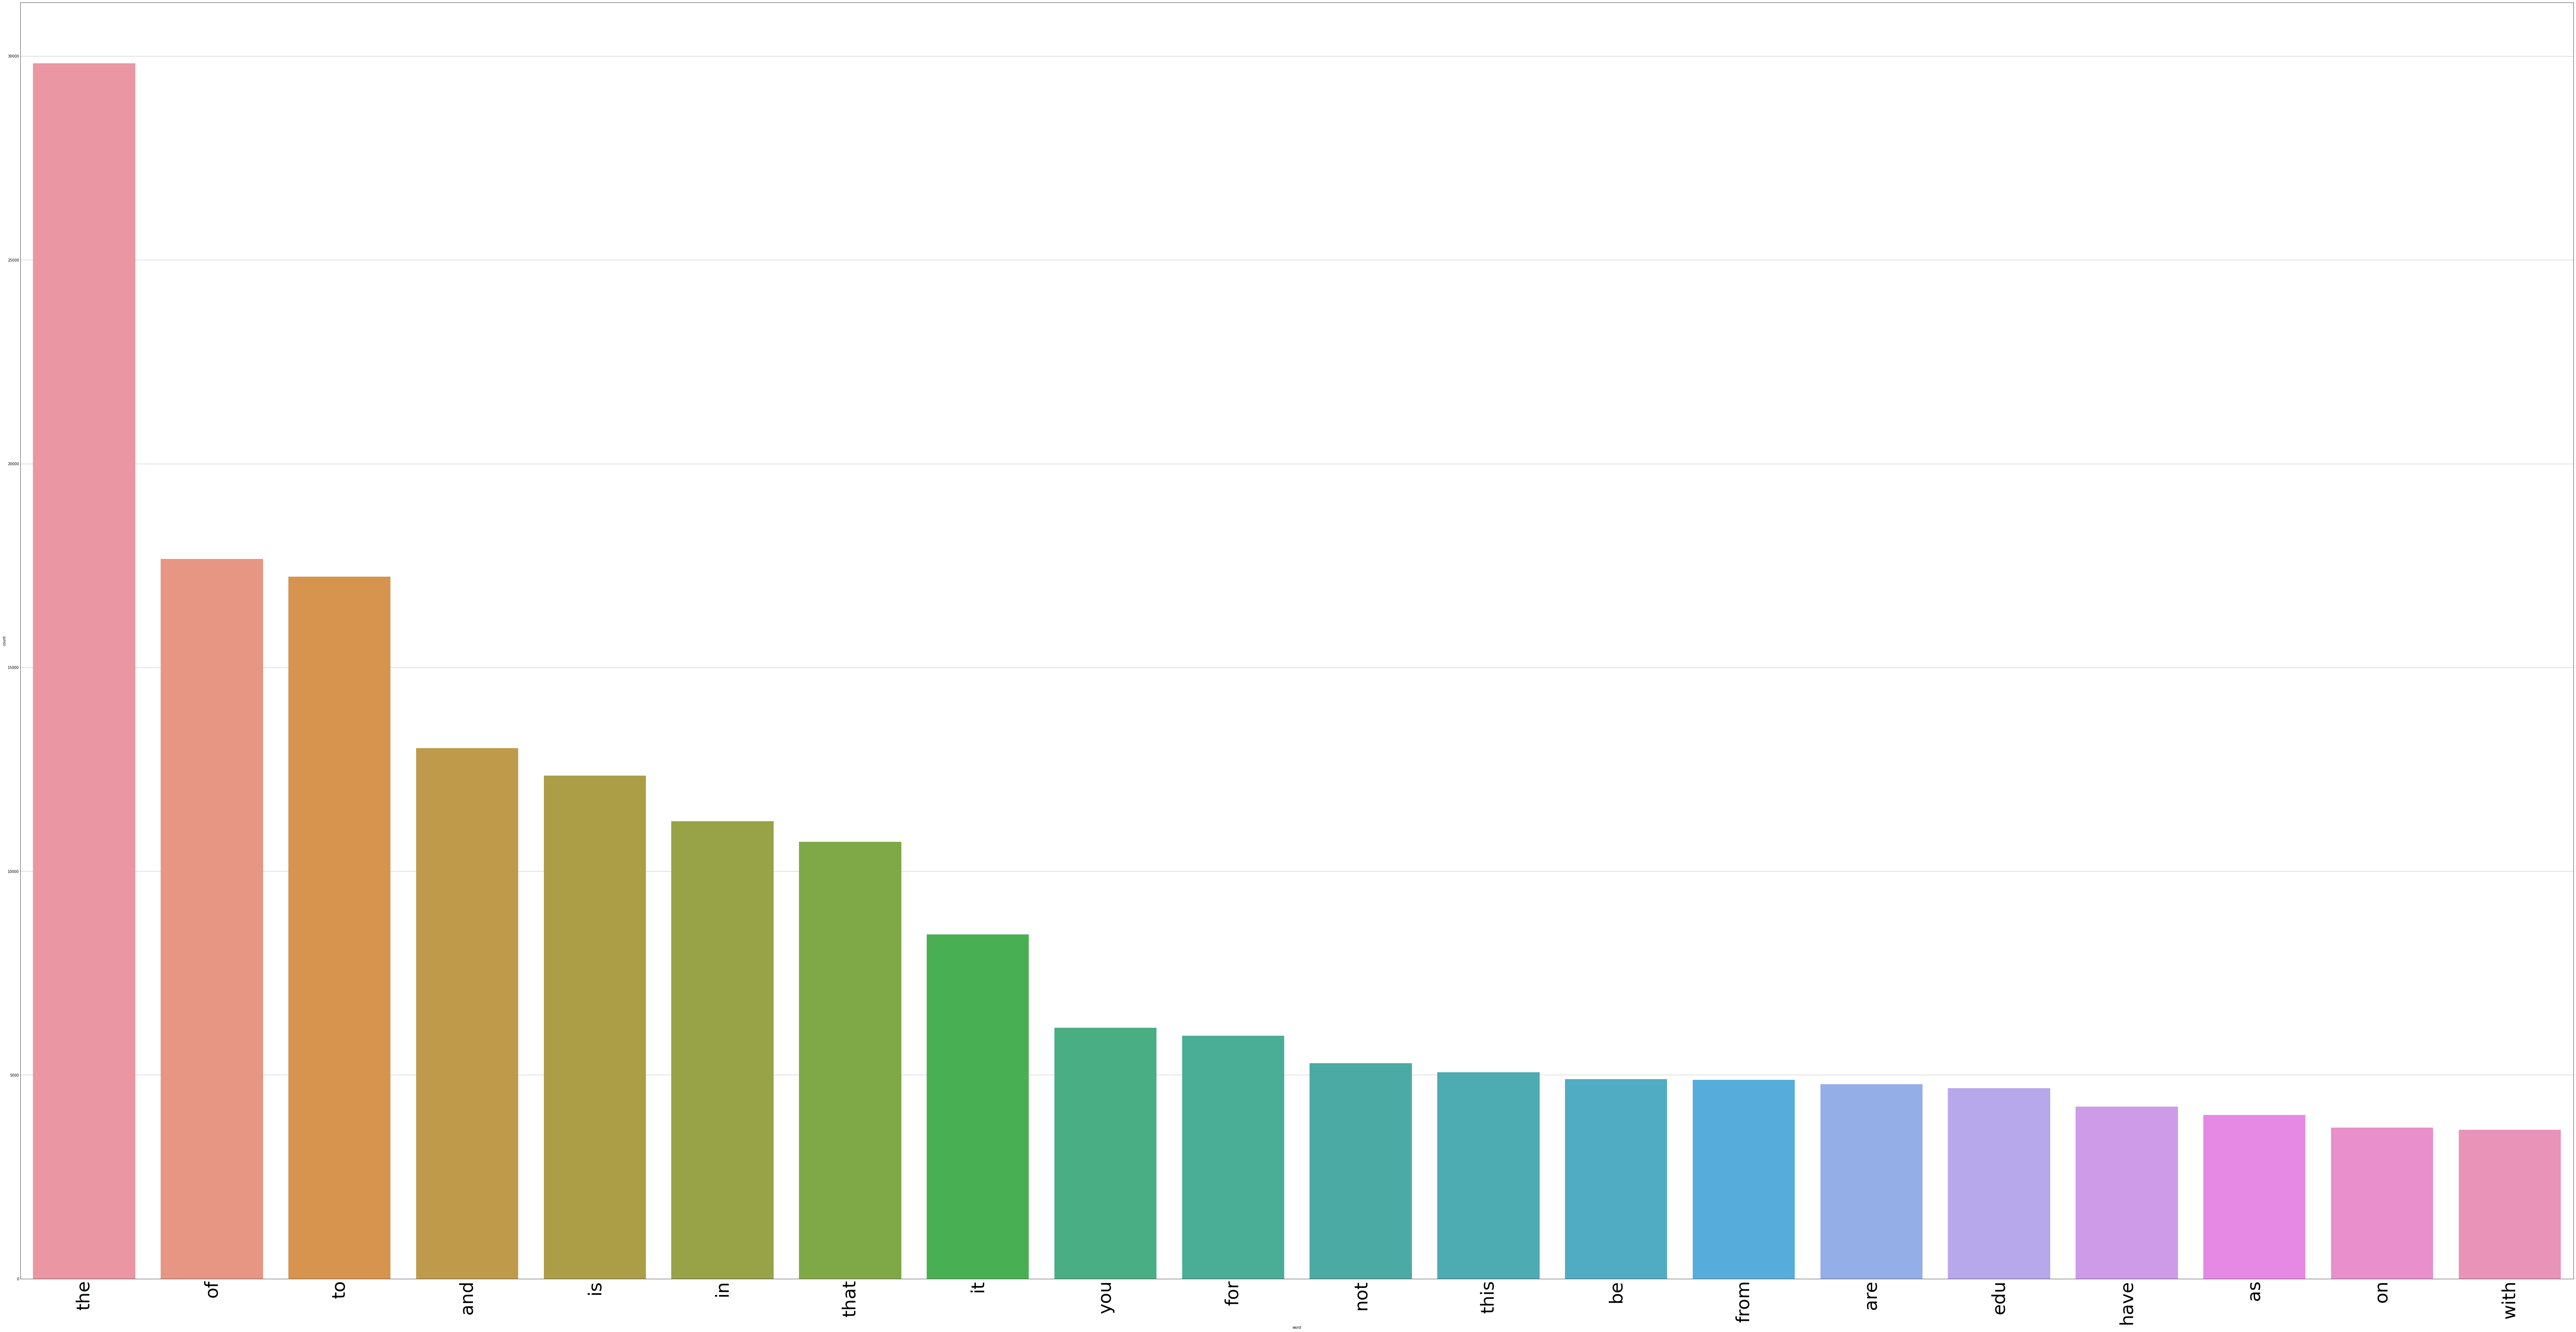

In [262]:
# Answer here
plt.subplots(figsize=(100, 50))
g = sns.barplot(y=df_count_300['count'][:20], 
            x=df_count_300['word'][:20])
g.set_xticklabels(df_count_300['word'][:20], fontsize=50, rotation = 90)

---

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [112]:
# Answer here
df= pd.DataFrame({'word':count_vect.get_feature_names_out()[:300],'frequency':term_frequencies[:300]})
df.sort_values(ascending=False,by='frequency',inplace=True)
df.head()

,word,frequency
242,10,378
0,00,134
243,100,105
103,03,100
37,01,95


[Text(0, 0, '10'),
 Text(1, 0, '00'),
 Text(2, 0, '100'),
 Text(3, 0, '03'),
 Text(4, 0, '01'),
 Text(5, 0, '000'),
 Text(6, 0, '05'),
 Text(7, 0, '02'),
 Text(8, 0, '04'),
 Text(9, 0, '08'),
 Text(10, 0, '09'),
 Text(11, 0, '07'),
 Text(12, 0, '0358'),
 Text(13, 0, '1000'),
 Text(14, 0, '101'),
 Text(15, 0, '06'),
 Text(16, 0, '00pm'),
 Text(17, 0, '1013'),
 Text(18, 0, '102'),
 Text(19, 0, '1024x768'),
 Text(20, 0, '071'),
 Text(21, 0, '1024'),
 Text(22, 0, '00am'),
 Text(23, 0, '0349'),
 Text(24, 0, '084042'),
 Text(25, 0, '0511'),
 Text(26, 0, '081052'),
 Text(27, 0, '101010'),
 Text(28, 0, '0200'),
 Text(29, 0, '0100'),
 Text(30, 0, '103'),
 Text(31, 0, '095220'),
 Text(32, 0, '0423'),
 Text(33, 0, '040'),
 Text(34, 0, '01580'),
 Text(35, 0, '02118'),
 Text(36, 0, '0293'),
 Text(37, 0, '0600'),
 Text(38, 0, '02173'),
 Text(39, 0, '041343'),
 Text(40, 0, '023044'),
 Text(41, 0, '024103'),
 Text(42, 0, '0608'),
 Text(43, 0, '06320'),
 Text(44, 0, '0x100'),
 Text(45, 0, '102007'),
 T

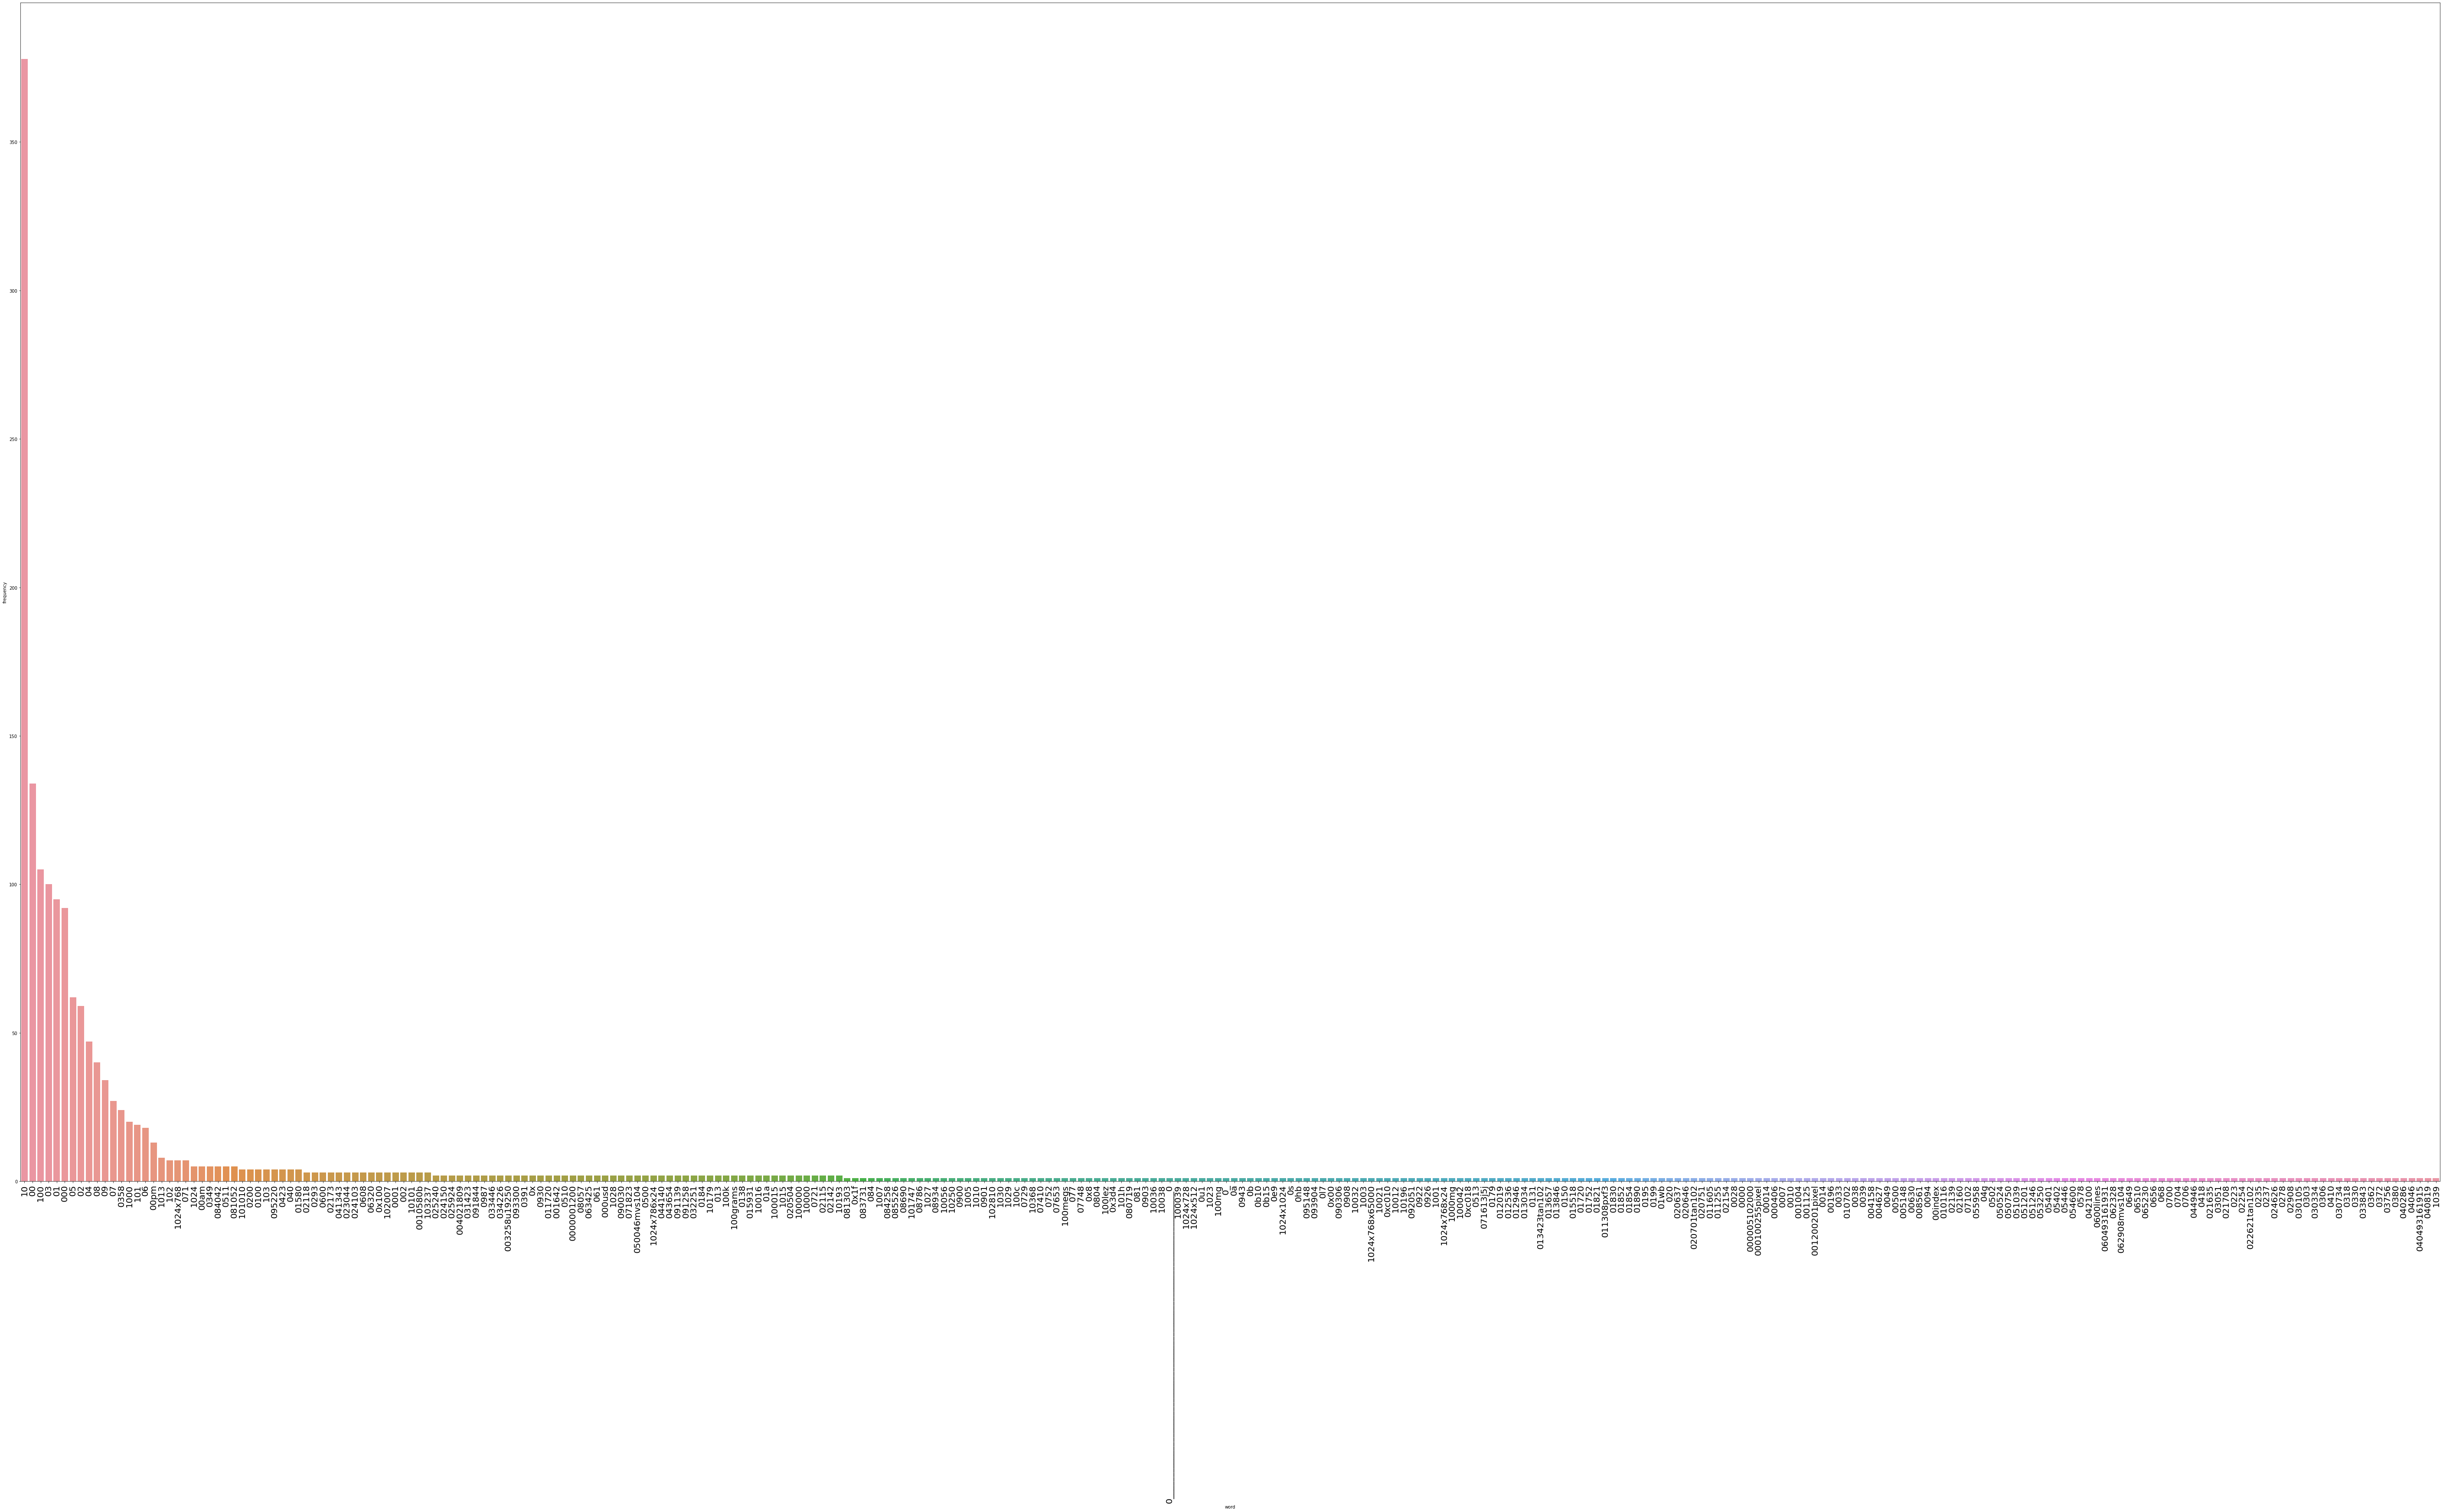

In [114]:
# Answer here
plt.subplots(figsize=(100, 50))
g = sns.barplot(y=df['frequency'], 
            x=df['word'])
g.set_xticklabels(df['word'], fontsize=20, rotation = 90)

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [117]:
X

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med


In [118]:
# Answer here
X_onehot = pd.get_dummies(X['category_name'])
X_dummy = pd.concat([X, X_onehot], axis=1)
X_dummy

,text,category,category_name,alt.atheism,comp.graphics,sci.med,soc.religion.christian
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,0,1,0,0
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,0,1,0,0
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,0,0,0,1
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,0,0,0,1
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,0,0,0,1
...,...,...,...,...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med,0,0,1,0
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med,0,0,1,0
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med,0,0,1,0
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med,0,0,1,0


it can work by using different function

---

# 2. The New Dataset (Basic)

## 1. The Data

In [1]:
### Begin Assignment Here
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

In [2]:
here = os.getcwd()

files = [("amazon", here + "/sentiment labelled sentences/amazon_cells_labelled.txt"),
         ("imdb", here + "/sentiment labelled sentences/imdb_labelled.txt"),
         ("yelp", here + "/sentiment labelled sentences/yelp_labelled.txt")]

In [3]:
dfs = []             
for provider, name in files:
    df = pd.read_csv(name, sep="\t")
    df.columns = ["sentence", "score"]
    df["provider"] = provider
    dfs.append(df)
    
data = pd.concat(dfs, axis=0)
print(data.head())

print("shape", data.shape)

                                            sentence  score provider
0                        Good case, Excellent value.      1   amazon
1                             Great for the jawbone.      1   amazon
2  Tied to charger for conversations lasting more...      0   amazon
3                                  The mic is great.      1   amazon
4  I have to jiggle the plug to get it to line up...      0   amazon
shape (2745, 3)


In [4]:
data_re=data.reset_index()

## 2. Data Preparation

In [5]:
# categories
data['score'].value_counts()
#1 = positive
#0 = negative

1    1385
0    1360
Name: score, dtype: int64

In [6]:
data_re.loc[0]['sentence']

'Good case, Excellent value.'

In [7]:
# An example of what the subset contains
print("\n".join(data_re.loc[0]['sentence'].split("\n")))

Good case, Excellent value.


In [8]:
# category of first 10 documents.
data.score[0:10]

0    1
1    1
2    0
3    1
4    0
5    0
6    1
7    0
8    0
9    1
Name: score, dtype: int64

## 3. Data Transformation

### 3.1 Converting Dictionary into Pandas Dataframe

In [9]:
#already DataFrame
type(data)

pandas.core.frame.DataFrame

In [10]:
len(data)

2745

In [11]:
data[0:2]

,sentence,score,provider
0,"Good case, Excellent value.",1,amazon
1,Great for the jawbone.,1,amazon


In [12]:
for t in data["sentence"][:3]:
    print(t)

Good case, Excellent value.
Great for the jawbone.
Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!


Adding Columns

In [13]:
# add category to the dataframe
data['category_name'] = data['score'].map({1: 'positive', 0: 'negative'})
data['category_name'].value_counts()

positive    1385
negative    1360
Name: category_name, dtype: int64

In [14]:
data.head()

,sentence,score,provider,category_name
0,"Good case, Excellent value.",1,amazon,positive
1,Great for the jawbone.,1,amazon,positive
2,Tied to charger for conversations lasting more...,0,amazon,negative
3,The mic is great.,1,amazon,positive
4,I have to jiggle the plug to get it to line up...,0,amazon,negative


### 3.2 Familiarizing yourself with the Data

In [15]:
# a simple query
data[:10][["sentence","category_name"]]

,sentence,category_name
0,"Good case, Excellent value.",positive
1,Great for the jawbone.,positive
2,Tied to charger for conversations lasting more...,negative
3,The mic is great.,positive
4,I have to jiggle the plug to get it to line up...,negative
5,If you have several dozen or several hundred c...,negative
6,If you are Razr owner...you must have this!,positive
7,"Needless to say, I wasted my money.",negative
8,What a waste of money and time!.,negative
9,And the sound quality is great.,positive


In [16]:
#Let's query the last 10 records
data[-10:]

,sentence,score,provider,category_name
989,The refried beans that came with my meal were ...,0,yelp,negative
990,Spend your money and time some place else.,0,yelp,negative
991,A lady at the table next to us found a live gr...,0,yelp,negative
992,the presentation of the food was awful.,0,yelp,negative
993,I can't tell you how disappointed I was.,0,yelp,negative
994,I think food should have flavor and texture an...,0,yelp,negative
995,Appetite instantly gone.,0,yelp,negative
996,Overall I was not impressed and would not go b...,0,yelp,negative
997,"The whole experience was underwhelming, and I ...",0,yelp,negative
998,"Then, as if I hadn't wasted enough of my life ...",0,yelp,negative


In [17]:
# using loc (by label)
data_re.loc[:10,'sentence']

0                           Good case, Excellent value.
1                                Great for the jawbone.
2     Tied to charger for conversations lasting more...
3                                     The mic is great.
4     I have to jiggle the plug to get it to line up...
5     If you have several dozen or several hundred c...
6           If you are Razr owner...you must have this!
7                   Needless to say, I wasted my money.
8                      What a waste of money and time!.
9                       And the sound quality is great.
10    He was very impressed when going from the orig...
Name: sentence, dtype: object

In [18]:
# using iloc (by position)
data.iloc[:10, 0]

0                          Good case, Excellent value.
1                               Great for the jawbone.
2    Tied to charger for conversations lasting more...
3                                    The mic is great.
4    I have to jiggle the plug to get it to line up...
5    If you have several dozen or several hundred c...
6          If you are Razr owner...you must have this!
7                  Needless to say, I wasted my money.
8                     What a waste of money and time!.
9                      And the sound quality is great.
Name: sentence, dtype: object

In [19]:
data.shape

(2745, 4)

## 4. Data Mining using Pandas

### 4.1 Missing Values

In [20]:
# check missing values
data.isnull()

,sentence,score,provider,category_name
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
994,False,False,False,False
995,False,False,False,False
996,False,False,False,False
997,False,False,False,False


In [21]:
import data_mining_helpers as dmh

data.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,provider,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0


In [22]:
# dummy record as dictionary format
dummy_dict = [{'sentence': 'dummy_record',
               'score': 1
              }]

In [23]:
data_dummy = pd.concat([data, pd.DataFrame(dummy_dict)], ignore_index=True)
len(data_dummy)

2746

In [24]:
data_dummy.isnull().apply(lambda data_dummy: dmh.check_missing_values(data_dummy))

,sentence,score,provider,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1,1


In [25]:
data_dummy.dropna(inplace=True)
data_dummy.isnull().apply(lambda data_dummy: dmh.check_missing_values(data_dummy))

,sentence,score,provider,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0


In [26]:
len(data_dummy)

2745

### 4.2 Dealing with Duplicate Data

In [27]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
994    False
995    False
996    False
997    False
998    False
Length: 2745, dtype: bool

In [28]:
sum(data.duplicated())

17

In [29]:
sum(data.duplicated('sentence'))

17

In [30]:
data.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe
len(data)

2711

## 5. Data Preprocessing

### 5.1 Sampling

In [31]:
print(data.shape)
data_sample = data.sample(n=1000,random_state=42) #random state
display(data_sample)

(2711, 4)


,sentence,score,provider,category_name
972,The food wasn't good.,0,yelp,negative
761,"The chicken dishes are OK, the beef is like sh...",0,yelp,negative
497,Bad Purchase.,0,amazon,negative
303,Everything worked on the first try.The device ...,1,amazon,positive
388,There is no plot here to keep you going in the...,0,imdb,negative
...,...,...,...,...
214,The camera really likes her in this movie.,1,imdb,positive
877,Does not work for listening to music with the ...,0,amazon,negative
252,"Not frightening in the least, and barely compr...",0,imdb,negative
857,"If I take a picture, the battery drops a bar, ...",0,amazon,negative


In [32]:
len(data_sample)

1000

In [33]:
data_sample[0:4]

,sentence,score,provider,category_name
972,The food wasn't good.,0,yelp,negative
761,"The chicken dishes are OK, the beef is like sh...",0,yelp,negative
497,Bad Purchase.,0,amazon,negative
303,Everything worked on the first try.The device ...,1,amazon,positive


### plot

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
data.head()

,sentence,score,provider,category_name
0,"Good case, Excellent value.",1,amazon,positive
1,Great for the jawbone.,1,amazon,positive
2,Tied to charger for conversations lasting more...,0,amazon,negative
3,The mic is great.,1,amazon,positive
4,I have to jiggle the plug to get it to line up...,0,amazon,negative


<Axes: title={'center': 'Category distribution'}>

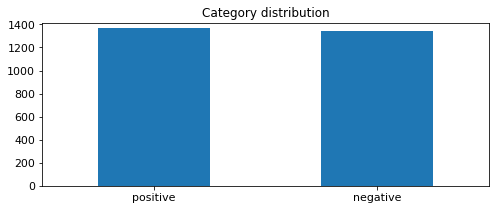

In [36]:
upper_bound = max(data.category_name.value_counts() + 50) #277 + 50

data.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, upper_bound],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

<Axes: title={'center': 'Category distribution'}>

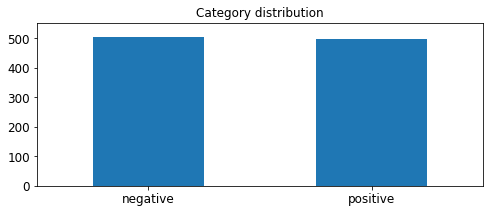

In [37]:
upper_bound_sample = max(data_sample.category_name.value_counts() + 50) #277 + 50

# plot barchart for X_sample
data_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_bound_sample], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

In [38]:
count_X = dict(data.category_name.value_counts())
count_X_sample = dict(data_sample.category_name.value_counts())

<Axes: xlabel='Category'>

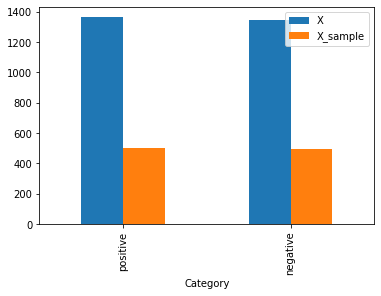

In [39]:
L = list(zip(list(count_X.keys()), list(count_X.values()),  list(count_X_sample.values())))
df_count = pd.DataFrame(L, columns=['Category', 'X', 'X_sample'])
df_count.plot(x='Category', 
        kind='bar', 
        stacked=False, 
        )

### 5.2 Feature Creation

In [40]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sonepanpan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [41]:
'''
LookupError: 
**********************************************************************
  Resource punkt not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('punkt')
'''
# takes a like a minute or two to process
data['unigrams'] = data['sentence'].apply(lambda x: dmh.tokenize_text(x))

In [42]:
data[0:4]["unigrams"]

0                 [Good, case, ,, Excellent, value, .]
1                        [Great, for, the, jawbone, .]
2    [Tied, to, charger, for, conversations, lastin...
3                             [The, mic, is, great, .]
Name: unigrams, dtype: object

In [43]:
data[0:4]

,sentence,score,provider,category_name,unigrams
0,"Good case, Excellent value.",1,amazon,positive,"[Good, case, ,, Excellent, value, .]"
1,Great for the jawbone.,1,amazon,positive,"[Great, for, the, jawbone, .]"
2,Tied to charger for conversations lasting more...,0,amazon,negative,"[Tied, to, charger, for, conversations, lastin..."
3,The mic is great.,1,amazon,positive,"[The, mic, is, great, .]"


In [44]:
list(data[0:1]['unigrams'])

[['Good', 'case', ',', 'Excellent', 'value', '.']]

### 5.3 Feature Subset Selection

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(data.sentence) #learn the vocabulary and return document-term matrix
print("shape: ", X_counts.shape)
print(X_counts[0])

shape:  (2711, 5149)
  (0, 1988)	1
  (0, 711)	1
  (0, 1598)	1
  (0, 4855)	1


In [46]:
count_vect.get_feature_names_out()[5148]

'zombiez'

In [47]:
count_vect.get_feature_names_out()[123]

'actors'

In [48]:
analyze = count_vect.build_analyzer()
analyze(data.sentence.iloc[0])
#stop words example: I, you, he, she...

['good', 'case', 'excellent', 'value']

In [49]:
analyze(" ".join(list(data.sentence.iloc[1])))
print(data.sentence.iloc[1])
print(" ".join(list(data.sentence.iloc[1])))

Great for the jawbone.
G r e a t   f o r   t h e   j a w b o n e .


In [50]:
# We can check the shape of this matrix by:
X_counts.shape

(2711, 5149)

In [51]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names_out()[0:10]

array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17'],
      dtype=object)

In [52]:
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [53]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

In [54]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
print(plot_x)

['term_00', 'term_10', 'term_100', 'term_11', 'term_12', 'term_13', 'term_15', 'term_15g', 'term_15pm', 'term_17', 'term_18', 'term_18th', 'term_1928', 'term_1947', 'term_1948', 'term_1949', 'term_1971', 'term_1973', 'term_1979', 'term_1980']


In [55]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(data.index)[0:20]]
print(plot_y)

['doc_0', 'doc_1', 'doc_2', 'doc_3', 'doc_4', 'doc_5', 'doc_6', 'doc_7', 'doc_8', 'doc_9', 'doc_10', 'doc_11', 'doc_12', 'doc_13', 'doc_14', 'doc_15', 'doc_16', 'doc_18', 'doc_19', 'doc_20']


In [56]:
plot_z = X_counts[20:40, 0:20].toarray() #X_counts[how many documents, how many terms]
print(plot_z)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


,term_00,term_10,term_100,term_11,term_12,term_13,term_15,term_15g,term_15pm,term_17,term_18,term_18th,term_1928,term_1947,term_1948,term_1949,term_1971,term_1973,term_1979,term_1980
doc_0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


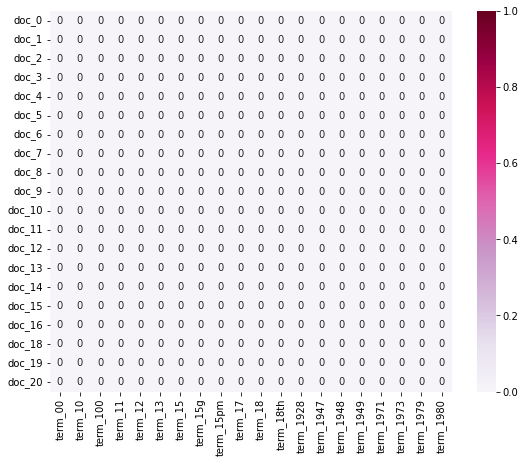

In [57]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### 5.4 Dimensionality Reduction

In [58]:
from sklearn.decomposition import PCA

In [59]:
print(X_counts.shape)
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())
print(X_reduced.shape)

(2711, 5149)
(2711, 2)


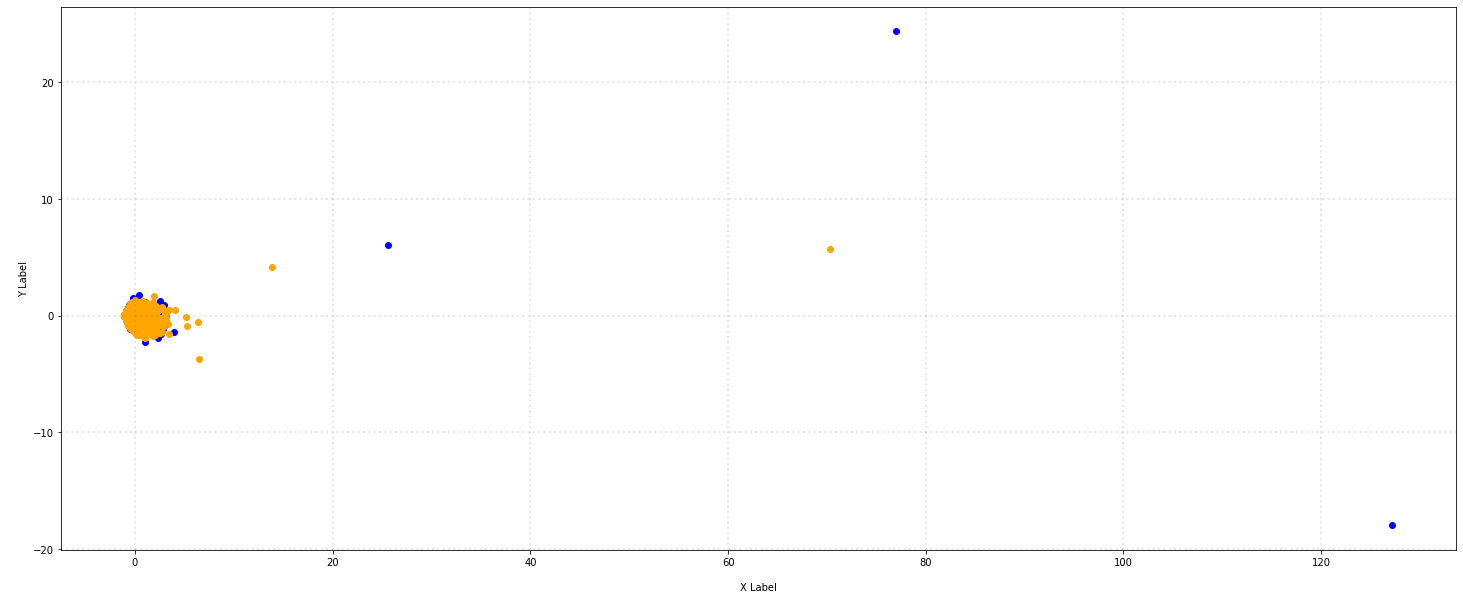

In [60]:
categories = ['negative', 'positive']
col = ['blue', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[data['category_name'] == category].T[0]
    ys = X_reduced[data['category_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

In [61]:
print(X_counts.shape)
X_reduced_3 = PCA(n_components = 3).fit_transform(X_counts.toarray())
print(X_reduced_3.shape)

(2711, 5149)
(2711, 3)


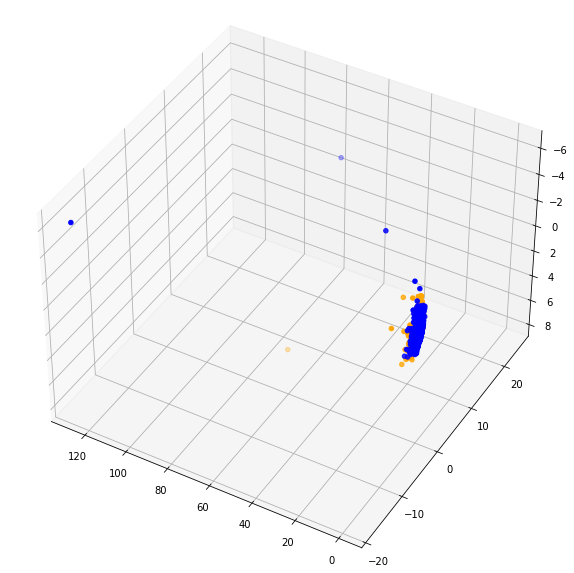

In [62]:
# Answer here
categories = ['negative', 'positive']
col = ['blue', 'orange']
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize = (10,20))
for c, category in zip(col, categories):
    xs = X_reduced_3[data['category_name'] == category].T[0]
    ys = X_reduced_3[data['category_name'] == category].T[1]
    zs = X_reduced_3[data['category_name'] == category].T[2]   
    ax.scatter(xs, ys, zs, c = c, marker='o')
ax.view_init(-140, 60)
plt.show()

### 5.5 Attribute Transformation / Aggregation

In [63]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
print(X_counts.shape[1])
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

#[3, 8, 5, 2, 5, 8, 2, 5, 3, 2]

5149


In [64]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [65]:
term_frequencies[0]

1

[Text(0, 0, '00'),
 Text(1, 0, '10'),
 Text(2, 0, '100'),
 Text(3, 0, '11'),
 Text(4, 0, '12'),
 Text(5, 0, '13'),
 Text(6, 0, '15'),
 Text(7, 0, '15g'),
 Text(8, 0, '15pm'),
 Text(9, 0, '17'),
 Text(10, 0, '18'),
 Text(11, 0, '18th'),
 Text(12, 0, '1928'),
 Text(13, 0, '1947'),
 Text(14, 0, '1948'),
 Text(15, 0, '1949'),
 Text(16, 0, '1971'),
 Text(17, 0, '1973'),
 Text(18, 0, '1979'),
 Text(19, 0, '1980'),
 Text(20, 0, '1986'),
 Text(21, 0, '1995'),
 Text(22, 0, '1998'),
 Text(23, 0, '20'),
 Text(24, 0, '2000'),
 Text(25, 0, '2005'),
 Text(26, 0, '2006'),
 Text(27, 0, '2007'),
 Text(28, 0, '20th'),
 Text(29, 0, '2160'),
 Text(30, 0, '23'),
 Text(31, 0, '24'),
 Text(32, 0, '25'),
 Text(33, 0, '2mp'),
 Text(34, 0, '30'),
 Text(35, 0, '30s'),
 Text(36, 0, '325'),
 Text(37, 0, '35'),
 Text(38, 0, '350'),
 Text(39, 0, '375'),
 Text(40, 0, '3o'),
 Text(41, 0, '40'),
 Text(42, 0, '40min'),
 Text(43, 0, '42'),
 Text(44, 0, '44'),
 Text(45, 0, '45'),
 Text(46, 0, '4s'),
 Text(47, 0, '4ths'),


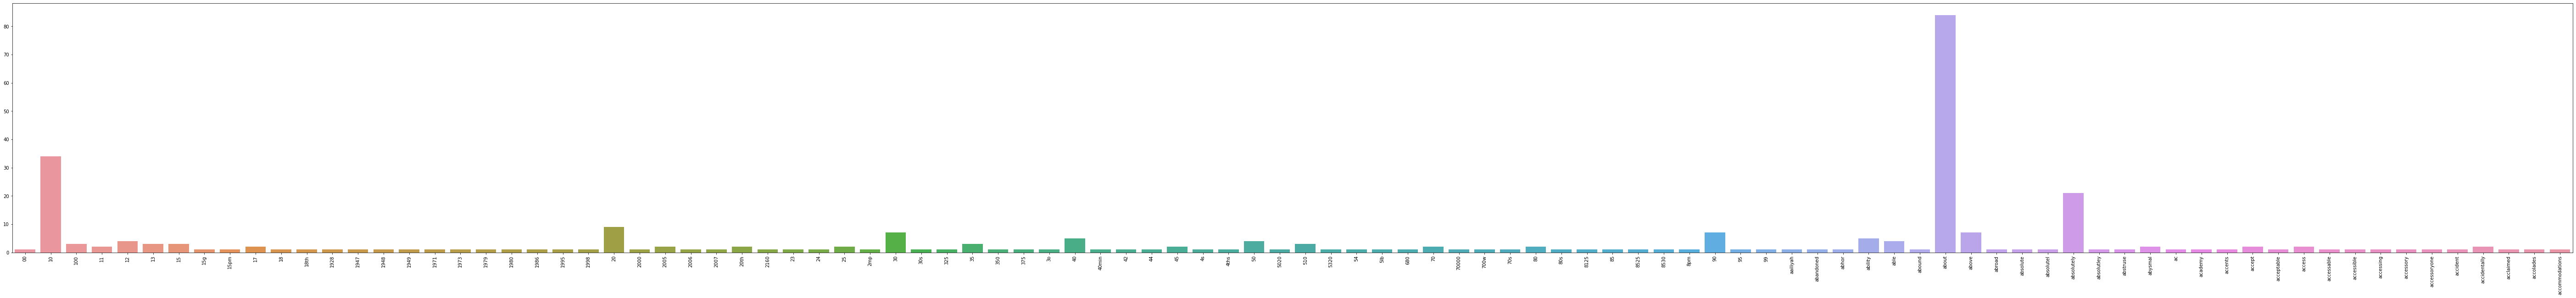

In [66]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:100], 
            y=term_frequencies[:100])
g.set_xticklabels(count_vect.get_feature_names_out()[:100], rotation = 90)

In [67]:
#top 100
L = np.flip(np.argsort(term_frequencies)[-100:])
print(count_vect.get_feature_names_out()[L[0]], term_frequencies[L[0]])

the 1948


In [68]:
df_count = pd.DataFrame(zip(count_vect.get_feature_names_out(), term_frequencies),
             columns=['word', 'count'])
df_count_100=df_count.loc[list(L)]
df_count_100.head()

,word,count
4525,the,1948
215,and,1138
2427,it,788
2422,is,749
4603,to,667


[Text(0, 0, 'the'),
 Text(1, 0, 'and'),
 Text(2, 0, 'it'),
 Text(3, 0, 'is'),
 Text(4, 0, 'to'),
 Text(5, 0, 'this'),
 Text(6, 0, 'of'),
 Text(7, 0, 'was'),
 Text(8, 0, 'in'),
 Text(9, 0, 'for'),
 Text(10, 0, 'that'),
 Text(11, 0, 'not'),
 Text(12, 0, 'with'),
 Text(13, 0, 'my'),
 Text(14, 0, 'very'),
 Text(15, 0, 'good'),
 Text(16, 0, 'on'),
 Text(17, 0, 'you'),
 Text(18, 0, 'but'),
 Text(19, 0, 'great'),
 Text(20, 0, 'have'),
 Text(21, 0, 'movie'),
 Text(22, 0, 'are'),
 Text(23, 0, 'as'),
 Text(24, 0, 'so'),
 Text(25, 0, 'film'),
 Text(26, 0, 'phone'),
 Text(27, 0, 'all'),
 Text(28, 0, 'be'),
 Text(29, 0, 'one'),
 Text(30, 0, 'had'),
 Text(31, 0, 'at'),
 Text(32, 0, 'food'),
 Text(33, 0, 'like'),
 Text(34, 0, 'just'),
 Text(35, 0, 'time'),
 Text(36, 0, 'there'),
 Text(37, 0, 'place'),
 Text(38, 0, 'service'),
 Text(39, 0, 'they'),
 Text(40, 0, 'an'),
 Text(41, 0, 'we'),
 Text(42, 0, 'were'),
 Text(43, 0, 'really'),
 Text(44, 0, 'from'),
 Text(45, 0, 'bad'),
 Text(46, 0, 'if'),
 Text(

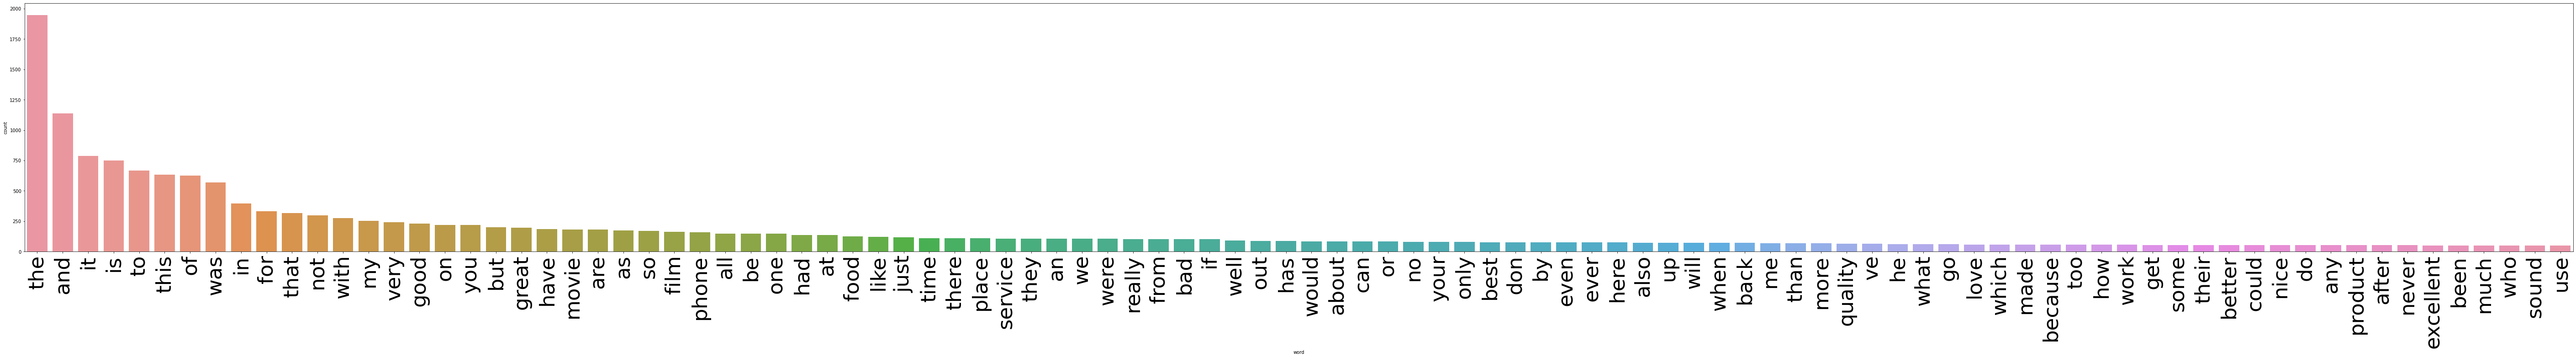

In [69]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(y=df_count_100['count'], 
            x=df_count_100['word'])
g.set_xticklabels(df_count_100['word'], fontsize=45, rotation = 90)

log transformation

In [70]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

[Text(0, 0, '00'),
 Text(1, 0, '10'),
 Text(2, 0, '100'),
 Text(3, 0, '11'),
 Text(4, 0, '12'),
 Text(5, 0, '13'),
 Text(6, 0, '15'),
 Text(7, 0, '15g'),
 Text(8, 0, '15pm'),
 Text(9, 0, '17'),
 Text(10, 0, '18'),
 Text(11, 0, '18th'),
 Text(12, 0, '1928'),
 Text(13, 0, '1947'),
 Text(14, 0, '1948'),
 Text(15, 0, '1949'),
 Text(16, 0, '1971'),
 Text(17, 0, '1973'),
 Text(18, 0, '1979'),
 Text(19, 0, '1980'),
 Text(20, 0, '1986'),
 Text(21, 0, '1995'),
 Text(22, 0, '1998'),
 Text(23, 0, '20'),
 Text(24, 0, '2000'),
 Text(25, 0, '2005'),
 Text(26, 0, '2006'),
 Text(27, 0, '2007'),
 Text(28, 0, '20th'),
 Text(29, 0, '2160'),
 Text(30, 0, '23'),
 Text(31, 0, '24'),
 Text(32, 0, '25'),
 Text(33, 0, '2mp'),
 Text(34, 0, '30'),
 Text(35, 0, '30s'),
 Text(36, 0, '325'),
 Text(37, 0, '35'),
 Text(38, 0, '350'),
 Text(39, 0, '375'),
 Text(40, 0, '3o'),
 Text(41, 0, '40'),
 Text(42, 0, '40min'),
 Text(43, 0, '42'),
 Text(44, 0, '44'),
 Text(45, 0, '45'),
 Text(46, 0, '4s'),
 Text(47, 0, '4ths'),


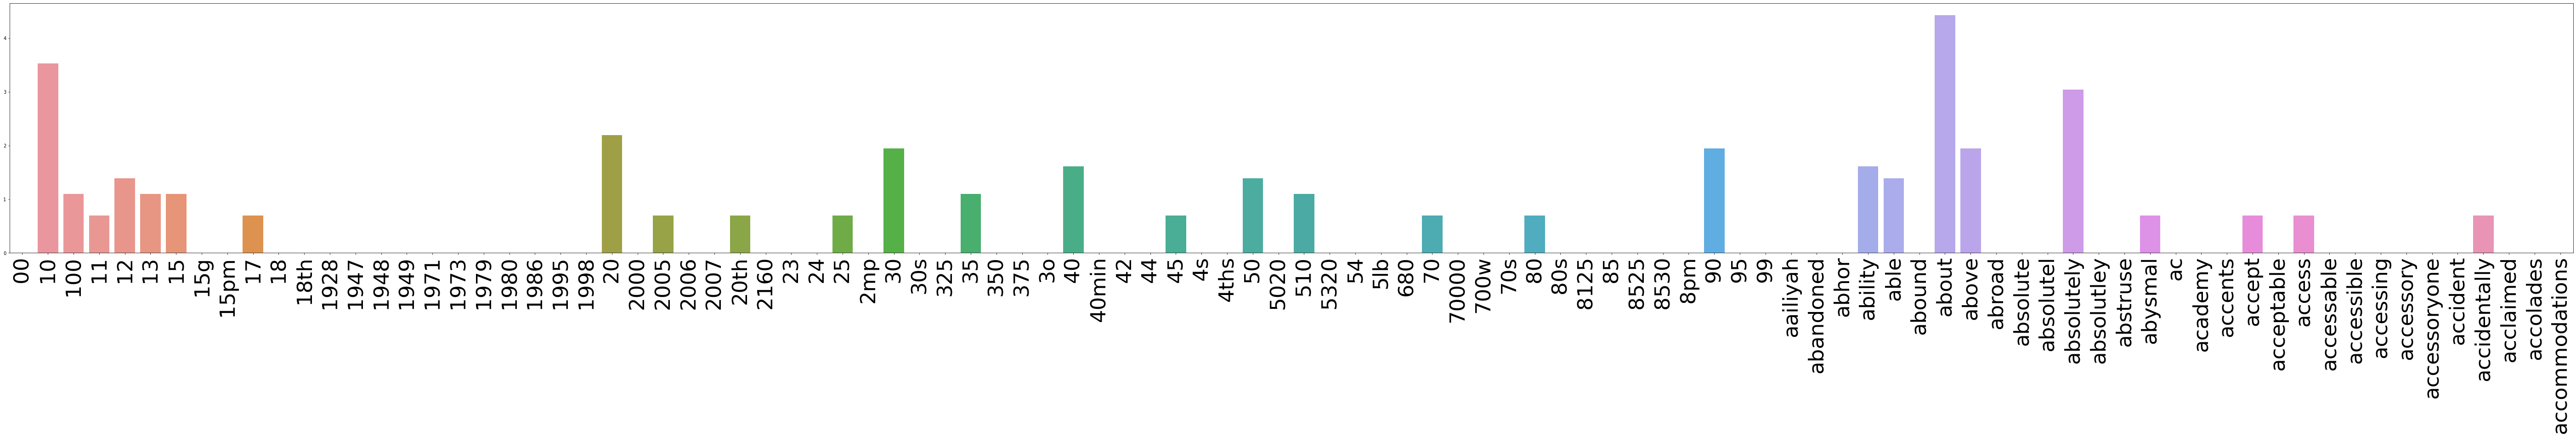

In [71]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:100],
                y=term_frequencies_log[:100])
g.set_xticklabels(count_vect.get_feature_names_out()[:100], fontsize=45, rotation = 90)

## 5.6 Discretization and Binarization

In [72]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [73]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(data.score)
data['bin_category'] = mlb.transform(data['score']).tolist()
data.head()

,sentence,score,provider,category_name,unigrams,bin_category
0,"Good case, Excellent value.",1,amazon,positive,"[Good, case, ,, Excellent, value, .]",[1]
1,Great for the jawbone.,1,amazon,positive,"[Great, for, the, jawbone, .]",[1]
2,Tied to charger for conversations lasting more...,0,amazon,negative,"[Tied, to, charger, for, conversations, lastin...",[0]
3,The mic is great.,1,amazon,positive,"[The, mic, is, great, .]",[1]
4,I have to jiggle the plug to get it to line up...,0,amazon,negative,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0]


In [74]:
# Answer here
X_onehot = pd.get_dummies(data['category_name'])
X_onehot = pd.concat([data, X_onehot], axis=1)
X_onehot.head()

,sentence,score,provider,category_name,unigrams,bin_category,negative,positive
0,"Good case, Excellent value.",1,amazon,positive,"[Good, case, ,, Excellent, value, .]",[1],0,1
1,Great for the jawbone.,1,amazon,positive,"[Great, for, the, jawbone, .]",[1],0,1
2,Tied to charger for conversations lasting more...,0,amazon,negative,"[Tied, to, charger, for, conversations, lastin...",[0],1,0
3,The mic is great.,1,amazon,positive,"[The, mic, is, great, .]",[1],0,1
4,I have to jiggle the plug to get it to line up...,0,amazon,negative,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0],1,0


## 6. Data Exploration

In [75]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = data.iloc[20]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = data.iloc[70]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = data.iloc[80]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['The commercials are the most misleading.']
['Great choice!']
['Well packaged, arrived on time, and works as intended.']


In [76]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [77]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


# 3. The New Dataset (Advanced)

## 1. meaningful data visualizations

<Axes: ylabel='provider'>

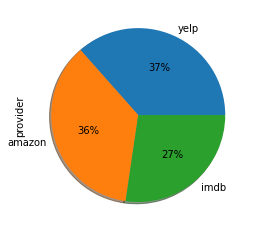

In [78]:
data['provider'].value_counts().plot(kind='pie', autopct='%1.0f%%', shadow=True)

<Axes: ylabel='category_name'>

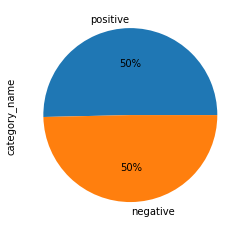

In [79]:
data.category_name.value_counts().plot(kind='pie', autopct='%1.0f%%')

In [80]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sonepanpan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [81]:
data['word_count'] = data['sentence'].apply(lambda x : len(x.split()))
data['char_count'] = data['sentence'].apply(lambda x : len(x.replace(" ","")))
data['stopwords'] = data['sentence'].apply(lambda x: len([x for x in x.split() if x in stopwords.words('english')]))
data['num_count'] = data['sentence'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
data['upper_count'] = data['sentence'].apply(lambda x: len([x for x in x.split() if x.isupper()]))

print(data[['word_count', 'char_count', 'stopwords', 'num_count', 'upper_count']].head(5))

data.sum(axis = 0, numeric_only = True)

   word_count  char_count  stopwords  num_count  upper_count
0           4          24          0          0            0
1           4          19          2          0            0
2          11          69          4          1            1
3           4          14          1          0            0
4          17          58          8          0            1


score            1365
word_count      35566
char_count     161252
stopwords       13806
num_count         404
upper_count      1251
dtype: int64

In [82]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

<ipython-input-83-5dc5cd29631b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_df1['score'] = all_df1['score'].astype(int)


(-0.5, 399.5, 199.5, -0.5)

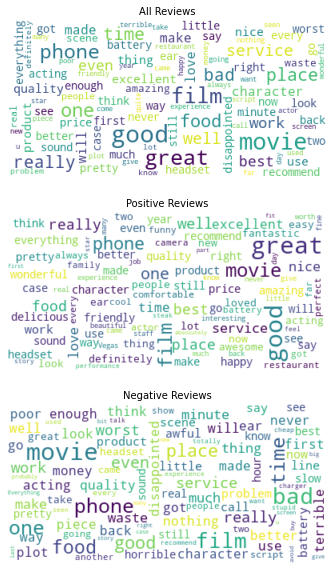

In [83]:
all_df1 = data[['sentence', 'score']]
all_df1['score'] = all_df1['score'].astype(int)
df_1 = all_df1[all_df1['score']==1]
df_0 = all_df1[all_df1['score']==0]
rev_All = " ".join(sentence for sentence in all_df1.sentence)
rev_1 = " ".join(sentence for sentence in df_1.sentence)
rev_0 = " ".join(sentence for sentence in df_0.sentence)

fig, ax = plt.subplots(3, 1, figsize  = (10,10))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=30, max_words=100, background_color="white").generate(rev_All)
wordcloud_1 = WordCloud(max_font_size=30, max_words=100, background_color="white").generate(rev_1)
wordcloud_0 = WordCloud(max_font_size=30, max_words=100, background_color="white").generate(rev_0)

# Display the generated image:
ax[0].imshow(wordcloud_ALL)
ax[0].set_title('All Reviews', fontsize=10)
ax[0].axis('off')
ax[1].imshow(wordcloud_1, interpolation='bilinear')
ax[1].set_title('Positive Reviews',fontsize=10)
ax[1].axis('off')
ax[2].imshow(wordcloud_0, interpolation='bilinear')
ax[2].set_title('Negative Reviews',fontsize=10)
ax[2].axis('off')

## 2. TF-IDF feature

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(data['sentence'])
vectorizer.get_feature_names_out()

array(['00', '10', '100', ..., 'zillion', 'zombie', 'zombiez'],
      dtype=object)

In [85]:
X_tfidf = np.matrix(X_tfidf.toarray()).astype(int)

In [86]:
X_tfidf.shape

(2711, 5149)

In [87]:
data_X_tfidf = pd.DataFrame(X_tfidf, columns=list(vectorizer.get_feature_names_out()))

In [88]:
data_Y = data['score'].reset_index()['score']
data_Y.head()

0    1
1    1
2    0
3    1
4    0
Name: score, dtype: int64

## 3. Naive Bayes Classifier

### TF-IDF

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_X_tfidf, data_Y, test_size=0.2, random_state=100, shuffle=True)

In [90]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2168, 5149) (2168,)
(543, 5149) (543,)


In [91]:
from sklearn.naive_bayes import GaussianNB

model_tfidf = GaussianNB()
model_tfidf.fit(X_train, y_train)

GaussianNB()

In [92]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

y_pred = model_tfidf.predict(X_test)
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.4990791896869245
F1 Score: 0.6658476658476659


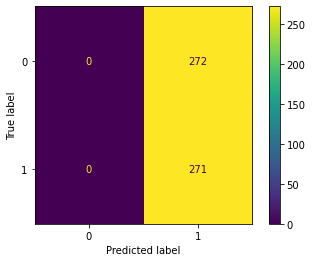

In [93]:
labels = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

### Word Frequency

In [94]:
X_counts = np.matrix(X_counts.toarray()).astype(int)

In [95]:
data_X_count = pd.DataFrame(X_counts, columns=list(count_vect.get_feature_names_out()))

In [96]:
X_train, X_test, y_train, y_test = train_test_split(data_X_count, data_Y, test_size=0.2, random_state=42, shuffle=True)

In [97]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2168, 5149) (2168,)
(543, 5149) (543,)


In [98]:
model_count = GaussianNB()
model_count.fit(X_train, y_train)

GaussianNB()

In [99]:
y_pred = model_count.predict(X_test)
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.6979742173112339
F1 Score: 0.7062061230424126


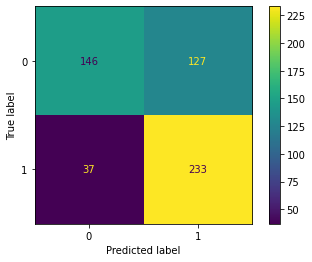

In [100]:
labels = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

# 4.

- In my opinion, this demonstration is for someone isn't familier with text mining. Maybe some code, function and plot are meaningless to repeat many time, but it's important to me to dig out the knowledge of text mining.
- There are so many technique which demenstrate in the code (PCA, unigrams...) and can apply to text data (stem, word2vector...), but we didn't use them into the model.
- The problem of sparce matrix didn't solve. I think maybe we need to do more preporcessing to deal with the high dimension data to enhance our performance.